![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

## Instructions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from functions import hist_maker, box_maker

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score

In [2]:
customer = pd.read_csv("customer_clean.csv")
customer

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,University,2011-02-24,Employed,F,56274,...,5,0,1,Corporate,L3,1,Agent,384.811147,Two-Door Car,Medsize
1,AI49188,Nevada,12887.431650,No,Premium,University,2011-02-19,Employed,F,48767,...,38,0,2,Personal,L3,1,Agent,566.472247,Two-Door Car,Medsize
2,WW63253,California,7645.861827,No,Basic,University,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate,L2,1,Call Center,529.881344,SUV,Medsize
3,HB64268,Washington,2813.692575,No,Basic,University,2011-02-03,Employed,M,43836,...,44,0,1,Personal,L1,1,Agent,138.130879,Four-Door Car,Medsize
4,OC83172,Oregon,8256.297800,Yes,Basic,University,2011-01-25,Employed,F,62902,...,94,0,2,Personal,L3,2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,YM19146,California,4100.398533,No,Premium,University,2011-01-06,Employed,F,47761,...,58,0,1,Personal,L2,1,Branch,541.282007,Four-Door Car,Large
7978,PK87824,California,3096.511217,Yes,Extended,University,2011-02-12,Employed,F,21604,...,28,0,1,Corporate,L3,1,Branch,379.200000,Four-Door Car,Medsize
7979,TD14365,California,8163.890428,No,Extended,University,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate,L2,1,Branch,790.784983,Four-Door Car,Medsize
7980,UP19263,California,7524.442436,No,Extended,University,2011-02-03,Employed,M,21941,...,3,0,3,Personal,L2,3,Branch,691.200000,Four-Door Car,Large


### 1. In this final lab, we will model our data.

Import sklearn `train_test_split` and separate the data.

In [3]:
X = customer.drop(["customer", "total_claim_amount"], axis = 1)
y = customer["total_claim_amount"]

In [4]:
X["effective_to_date"] = X["effective_to_date"].str.replace("-","").astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 22)

### 2. We will start with removing outliers, if you have not already done so. 
We have discussed different methods to remove outliers.

Use the one you feel more comfortable with, define a function for that.

Use the function to remove the outliers and apply it to the dataframe.

This was already done in a previous lab

### 3. Create a copy of the dataframe for the data wrangling.

In [6]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes("object")

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes("object")

### 4. Normalize the continuous variables.

You can use any one method you want.

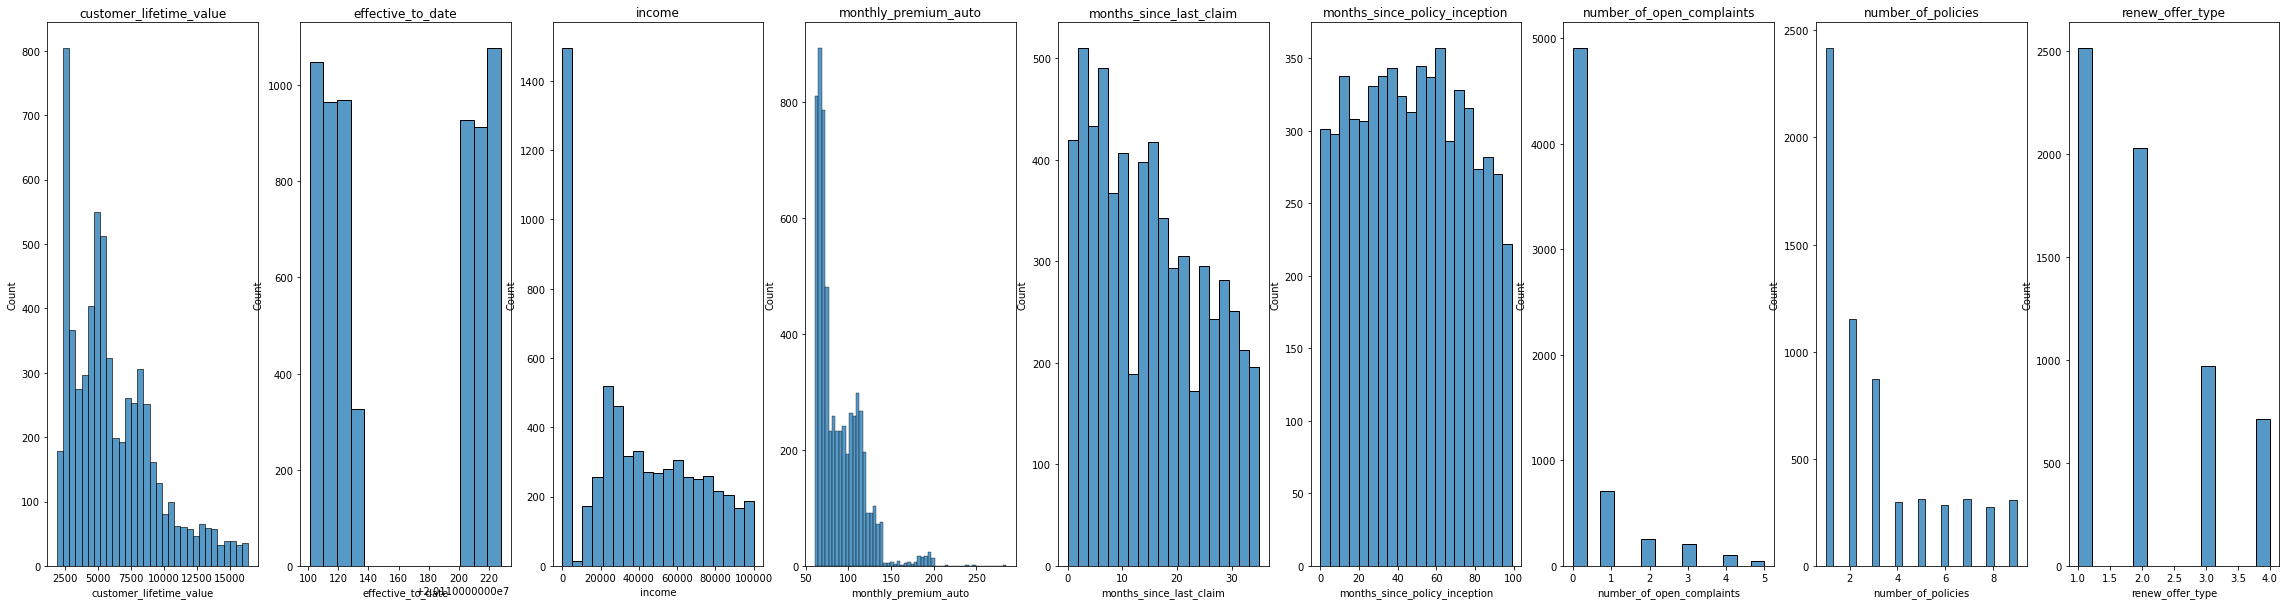

In [7]:
hist_maker(X_train_num)

In [8]:
def log_transf(x):
    if (np.isfinite(x)) and (x != 0):
        return np.log(x)
    else:
        return x
    
X_train_num["customer_lifetime_value"] = X_train_num["customer_lifetime_value"].apply(log_transf)
X_train_num["income"] = X_train_num["income"].apply(log_transf)
X_test_num["customer_lifetime_value"] = X_test_num["customer_lifetime_value"].apply(log_transf)
X_test_num["income"] = X_test_num["income"].apply(log_transf)

<AxesSubplot:xlabel='income', ylabel='Count'>

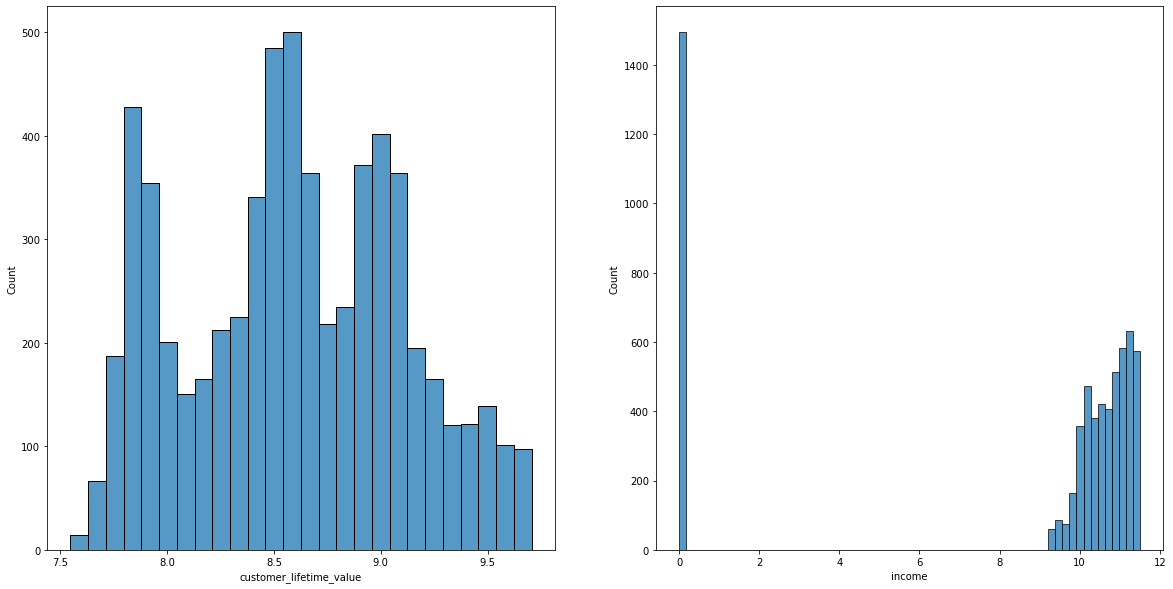

In [9]:
fig, ax = plt.subplots(1,2, figsize = (20, 10))    
sns.histplot(X_train_num["customer_lifetime_value"], ax = ax[0])
sns.histplot(X_train_num["income"], ax = ax[1])

The `income` column is an issue with all the 0, we might want to predict it with K-NN sometime.

In [10]:
mm_scaler = MinMaxScaler().fit(X_train_num)
X_train_num_mm = mm_scaler.transform(X_train_num)
X_train_num_mm = pd.DataFrame(X_train_num_mm, columns = X_train_num.columns)

X_test_num_mm = mm_scaler.transform(X_test_num)
X_test_num_mm = pd.DataFrame(X_test_num_mm, columns = X_test_num.columns)

In [11]:
X_train_num_mm

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type
0,0.946927,0.031496,0.880838,0.290179,0.028571,0.131313,0.0,0.125,1.000000
1,0.347488,0.055118,0.914552,0.169643,0.257143,0.171717,0.0,0.000,0.333333
2,0.627876,0.133858,0.893953,0.000000,0.742857,0.626263,0.0,0.125,0.666667
3,0.154386,0.937008,0.915688,0.035714,0.371429,0.151515,0.0,0.000,0.333333
4,0.742472,0.858268,0.999309,0.250000,0.771429,0.272727,0.0,0.250,0.666667
...,...,...,...,...,...,...,...,...,...
6220,0.458286,0.181102,0.867166,0.334821,0.000000,0.252525,0.0,0.000,0.000000
6221,0.124512,0.141732,0.000000,0.044643,0.371429,0.505051,0.0,0.000,0.000000
6222,0.462314,0.952756,0.956046,0.017857,0.914286,0.191919,0.0,0.750,0.666667
6223,0.411154,0.212598,0.870725,0.008929,0.828571,0.515152,0.0,1.000,0.333333


### 5. Encode the categorical variables

(See the hint below for encoding categorical data!!!)

In [12]:
X_train_cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size
4837,Oregon,No,Extended,Postgraduate,Employed,M,Suburban,Single,Personal,L1,Branch,SUV,Medsize
5829,Oregon,Yes,Extended,Postgraduate,Employed,F,Suburban,Married,Personal,L3,Agent,Four-Door Car,Medsize
2291,Oregon,No,Basic,University,Employed,F,Suburban,Married,Personal,L2,Web,Four-Door Car,Medsize
6128,Oregon,Yes,Basic,University,Employed,M,Urban,Single,Personal,L2,Agent,Four-Door Car,Medsize
2148,California,No,Basic,High School or Below,Employed,F,Rural,Single,Corporate,L3,Web,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Washington,No,Extended,University,Excempt,F,Suburban,Divorced,Corporate,L2,Branch,SUV,Medsize
7104,California,No,Basic,University,Unemployed,M,Suburban,Single,Personal,L2,Call Center,Four-Door Car,Medsize
4908,Oregon,No,Basic,High School or Below,Employed,M,Rural,Married,Personal,L1,Web,Four-Door Car,Medsize
6276,California,Yes,Basic,University,Excempt,F,Suburban,Single,Personal,L3,Web,Four-Door Car,Large


In [13]:
X_train_cat_oh = X_train_cat[["state", "response", "gender", "marital_status", "policy_type", "sales_channel", "vehicle_class"]]
X_train_cat_ord = X_train_cat.drop(columns = ["state", "response", "gender", "marital_status", "policy_type", "sales_channel", "vehicle_class"], axis = 1)

X_test_cat_oh = X_test_cat[["state", "response", "gender", "marital_status", "policy_type", "sales_channel", "vehicle_class"]]
X_test_cat_ord = X_test_cat.drop(columns = ["state", "response", "gender", "marital_status", "policy_type", "sales_channel", "vehicle_class"], axis = 1)

In [14]:
X_train_cat_oh = pd.get_dummies(X_train_cat_oh, drop_first = True)
X_test_cat_oh = pd.get_dummies(X_test_cat_oh, drop_first = True)
X_train_cat_oh

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car
4837,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0
5829,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
2291,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
6128,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2148,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7104,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
4908,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
6276,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0


In [15]:
X_train_cat_ord

,coverage,education,employment_status,location_code,policy,vehicle_size
4837,Extended,Postgraduate,Employed,Suburban,L1,Medsize
5829,Extended,Postgraduate,Employed,Suburban,L3,Medsize
2291,Basic,University,Employed,Suburban,L2,Medsize
6128,Basic,University,Employed,Urban,L2,Medsize
2148,Basic,High School or Below,Employed,Rural,L3,Medsize
...,...,...,...,...,...,...
356,Extended,University,Excempt,Suburban,L2,Medsize
7104,Basic,University,Unemployed,Suburban,L2,Medsize
4908,Basic,High School or Below,Employed,Rural,L1,Medsize
6276,Basic,University,Excempt,Suburban,L3,Large


In [16]:
X_train_cat_ord["coverage"].unique()

array(['Extended', 'Basic', 'Premium'], dtype=object)

In [17]:
X_train_cat_ord["coverage"] = X_train_cat_ord["coverage"].map({"Basic":0, "Extended":0.5, "Premium":1})
X_test_cat_ord["coverage"] = X_test_cat_ord["coverage"].map({"Basic":0, "Extended":0.5, "Premium":1})

In [18]:
X_train_cat_ord["education"].unique()

array(['Postgraduate', 'University', 'High School or Below'], dtype=object)

In [19]:
X_train_cat_ord["education"] = X_train_cat_ord["education"].map({"High School or Below":0, "University":0.5, "Postgraduate":1})
X_test_cat_ord["education"] = X_test_cat_ord["education"].map({"High School or Below":0, "University":0.5, "Postgraduate":1})

In [20]:
X_train_cat_ord["employment_status"].unique()

array(['Employed', 'Excempt', 'Unemployed'], dtype=object)

In [21]:
X_train_cat_ord["employment_status"] = X_train_cat_ord["employment_status"].map({"Excempt":0, "Unemployed":0.5, "Employed":1})
X_test_cat_ord["employment_status"] = X_test_cat_ord["employment_status"].map({"Excempt":0, "Unemployed":0.5, "Employed":1})

In [22]:
X_train_cat_ord["location_code"].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [23]:
X_train_cat_ord["location_code"] = X_train_cat_ord["location_code"].map({"Rural":0, "Suburban":0.5, "Urban":1})
X_test_cat_ord["location_code"] = X_test_cat_ord["location_code"].map({"Rural":0, "Suburban":0.5, "Urban":1})

In [24]:
X_train_cat_ord["policy"].unique()

array(['L1', 'L3', 'L2'], dtype=object)

In [25]:
X_train_cat_ord["policy"] = X_train_cat_ord["policy"].map({"L1":0, "L2":0.5, "L3":1})
X_test_cat_ord["policy"] = X_test_cat_ord["policy"].map({"L1":0, "L2":0.5, "L3":1})

In [26]:
X_train_cat_ord["vehicle_size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [27]:
X_train_cat_ord["vehicle_size"] = X_train_cat_ord["vehicle_size"].map({"Small":0, "Medsize":0.5, "Large":1})
X_test_cat_ord["vehicle_size"] = X_test_cat_ord["vehicle_size"].map({"Small":0, "Medsize":0.5, "Large":1})

In [28]:
X_train_cat_oh

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car
4837,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0
5829,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
2291,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
6128,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2148,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7104,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
4908,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
6276,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0


In [29]:
X_train_cat_ord

,coverage,education,employment_status,location_code,policy,vehicle_size
4837,0.5,1.0,1.0,0.5,0.0,0.5
5829,0.5,1.0,1.0,0.5,1.0,0.5
2291,0.0,0.5,1.0,0.5,0.5,0.5
6128,0.0,0.5,1.0,1.0,0.5,0.5
2148,0.0,0.0,1.0,0.0,1.0,0.5
...,...,...,...,...,...,...
356,0.5,0.5,0.0,0.5,0.5,0.5
7104,0.0,0.5,0.5,0.5,0.5,0.5
4908,0.0,0.0,1.0,0.0,0.0,0.5
6276,0.0,0.5,0.0,0.5,1.0,1.0


In [30]:
X_train_cat_encoded = pd.concat([X_train_cat_oh, X_train_cat_ord], axis = 1).reset_index()
X_test_cat_encoded = pd.concat([X_test_cat_oh, X_test_cat_ord], axis = 1).reset_index()

X_train_cat_encoded = X_train_cat_encoded.drop(columns = X_train_cat_encoded.columns[0], axis = 1)
X_test_cat_encoded = X_test_cat_encoded.drop(columns = X_test_cat_encoded.columns[0], axis = 1)
X_train_cat_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,...,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employment_status,location_code,policy,vehicle_size
0,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0.5,1.0,1.0,0.5,0.0,0.5
1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0.5,1.0,1.0,0.5,1.0,0.5
2,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0.0,0.5,1.0,0.5,0.5,0.5
3,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0.0,0.5,1.0,1.0,0.5,0.5
4,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0.0,0.0,1.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0.5,0.5,0.0,0.5,0.5,0.5
6221,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0.0,0.5,0.5,0.5,0.5,0.5
6222,0,0,1,0,0,1,1,0,1,0,...,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.5
6223,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0.0,0.5,0.0,0.5,1.0,1.0


### 6. The time variable can be useful.

Try to transform its data into a useful one.

Hint: Day week and month as integers might be useful.

Moved to the beginning to use the MinMaxScaler.

### 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


#### Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

Encoder Type | Column 
-----------------|-----------------
One hot | state
Ordinal | coverage
Ordinal | employmentstatus
Ordinal | location code
One hot | marital status
One hot | policy type
One hot | policy
One hot | renew offercustomer_df
One hot | sales channel
One hot | vehicle class
Ordinal | vehicle size

##### Dummy code

```python
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
```

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

In [31]:
X_train_num_mm

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type
0,0.946927,0.031496,0.880838,0.290179,0.028571,0.131313,0.0,0.125,1.000000
1,0.347488,0.055118,0.914552,0.169643,0.257143,0.171717,0.0,0.000,0.333333
2,0.627876,0.133858,0.893953,0.000000,0.742857,0.626263,0.0,0.125,0.666667
3,0.154386,0.937008,0.915688,0.035714,0.371429,0.151515,0.0,0.000,0.333333
4,0.742472,0.858268,0.999309,0.250000,0.771429,0.272727,0.0,0.250,0.666667
...,...,...,...,...,...,...,...,...,...
6220,0.458286,0.181102,0.867166,0.334821,0.000000,0.252525,0.0,0.000,0.000000
6221,0.124512,0.141732,0.000000,0.044643,0.371429,0.505051,0.0,0.000,0.000000
6222,0.462314,0.952756,0.956046,0.017857,0.914286,0.191919,0.0,0.750,0.666667
6223,0.411154,0.212598,0.870725,0.008929,0.828571,0.515152,0.0,1.000,0.333333


In [32]:
X_train_cat_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,...,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employment_status,location_code,policy,vehicle_size
0,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0.5,1.0,1.0,0.5,0.0,0.5
1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0.5,1.0,1.0,0.5,1.0,0.5
2,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0.0,0.5,1.0,0.5,0.5,0.5
3,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0.0,0.5,1.0,1.0,0.5,0.5
4,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0.0,0.0,1.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0.5,0.5,0.0,0.5,0.5,0.5
6221,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0.0,0.5,0.5,0.5,0.5,0.5
6222,0,0,1,0,0,1,1,0,1,0,...,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.5
6223,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0.0,0.5,0.0,0.5,1.0,1.0


In [33]:
X_train_treated = pd.concat([X_train_num_mm, X_train_cat_encoded], axis = 1)
X_test_treated = pd.concat([X_test_num_mm, X_test_cat_encoded], axis = 1)

In [34]:
X_train_treated

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,state_California,...,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employment_status,location_code,policy,vehicle_size
0,0.946927,0.031496,0.880838,0.290179,0.028571,0.131313,0.0,0.125,1.000000,0,...,0,0,1,0,0.5,1.0,1.0,0.5,0.0,0.5
1,0.347488,0.055118,0.914552,0.169643,0.257143,0.171717,0.0,0.000,0.333333,0,...,0,0,0,0,0.5,1.0,1.0,0.5,1.0,0.5
2,0.627876,0.133858,0.893953,0.000000,0.742857,0.626263,0.0,0.125,0.666667,0,...,1,0,0,0,0.0,0.5,1.0,0.5,0.5,0.5
3,0.154386,0.937008,0.915688,0.035714,0.371429,0.151515,0.0,0.000,0.333333,0,...,0,0,0,0,0.0,0.5,1.0,1.0,0.5,0.5
4,0.742472,0.858268,0.999309,0.250000,0.771429,0.272727,0.0,0.250,0.666667,1,...,1,0,1,0,0.0,0.0,1.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,0.458286,0.181102,0.867166,0.334821,0.000000,0.252525,0.0,0.000,0.000000,0,...,0,0,1,0,0.5,0.5,0.0,0.5,0.5,0.5
6221,0.124512,0.141732,0.000000,0.044643,0.371429,0.505051,0.0,0.000,0.000000,1,...,0,0,0,0,0.0,0.5,0.5,0.5,0.5,0.5
6222,0.462314,0.952756,0.956046,0.017857,0.914286,0.191919,0.0,0.750,0.666667,0,...,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.5
6223,0.411154,0.212598,0.870725,0.008929,0.828571,0.515152,0.0,1.000,0.333333,1,...,1,0,0,0,0.0,0.5,0.0,0.5,1.0,1.0


In [35]:
X_test_treated

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,state_California,...,sales_channel_Web,vehicle_class_High-end,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,education,employment_status,location_code,policy,vehicle_size
0,0.459538,0.881890,0.976689,0.008929,0.257143,0.131313,0.0,0.250,0.666667,1,...,1,0,0,0,0.0,0.0,1.0,0.5,1.0,0.5
1,0.806006,0.015748,0.930067,0.133929,0.742857,0.888889,0.0,0.125,0.000000,0,...,0,0,0,0,0.5,0.0,1.0,0.0,1.0,0.5
2,0.528200,0.188976,0.872703,0.156250,0.800000,0.909091,1.0,0.500,0.000000,0,...,0,0,0,0,0.5,0.5,0.0,0.5,1.0,0.5
3,0.424485,0.228346,0.000000,0.066964,0.800000,0.555556,1.0,0.250,0.000000,0,...,0,0,0,1,0.5,0.5,0.5,0.0,1.0,0.5
4,0.394214,0.874016,0.989516,0.223214,0.142857,0.595960,0.0,0.000,0.000000,0,...,0,0,1,0,0.0,0.5,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.364899,0.795276,0.000000,0.035714,0.628571,0.989899,0.6,0.875,0.000000,0,...,0,0,0,0,0.0,0.5,0.5,0.5,1.0,0.5
1753,0.703022,0.897638,0.993126,0.205357,0.457143,0.090909,0.2,0.250,0.333333,1,...,0,0,1,0,0.0,1.0,1.0,0.0,0.5,0.5
1754,0.453468,0.181102,0.954615,0.013393,0.400000,0.929293,0.0,0.375,0.333333,1,...,0,0,0,1,0.0,0.5,1.0,1.0,1.0,0.5
1755,0.302682,0.110236,0.983283,0.129464,0.028571,0.696970,0.0,0.000,0.333333,0,...,0,0,0,1,0.5,0.0,1.0,0.5,0.0,1.0


### 8. Try a simple linear regression with all the data to see whether we are getting good results.

In [36]:
lr = LinearRegression()
lr.fit(X_train_treated, y_train)

y_pred_train = lr.predict(X_train_treated)
y_pred_test = lr.predict(X_test_treated)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.5250210838816061
0.5135425656431525


### 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [37]:
def model_test(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        print("Train score of model {} is {:.2f}".format(model, r2_score(y_train, y_pred_train)))
        print("Test score of model {} is {:.2f}".format(model, r2_score(y_test, y_pred_test)))

### 10. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

In [38]:
models = []

for x in range(2,10):
    knn_model = KNeighborsRegressor(n_neighbors = x)
    models.append(knn_model)

### 11. You can check also the `MLPRegressor` for this task!

In [39]:
mlp1 = MLPRegressor(random_state = 22, solver = "lbfgs")
mlp2 = MLPRegressor(random_state = 22, solver = "adam")

In [40]:
models.append(mlp1)
models.append(mlp2)
models.append(lr)

In [41]:
model_test(models, X_train_treated, y_train, X_test_treated, y_test)

Train score of model KNeighborsRegressor(n_neighbors=2) is 0.76
Test score of model KNeighborsRegressor(n_neighbors=2) is 0.30
Train score of model KNeighborsRegressor(n_neighbors=3) is 0.69
Test score of model KNeighborsRegressor(n_neighbors=3) is 0.38
Train score of model KNeighborsRegressor(n_neighbors=4) is 0.65
Test score of model KNeighborsRegressor(n_neighbors=4) is 0.42
Train score of model KNeighborsRegressor() is 0.62
Test score of model KNeighborsRegressor() is 0.44
Train score of model KNeighborsRegressor(n_neighbors=6) is 0.60
Test score of model KNeighborsRegressor(n_neighbors=6) is 0.44
Train score of model KNeighborsRegressor(n_neighbors=7) is 0.58
Test score of model KNeighborsRegressor(n_neighbors=7) is 0.45
Train score of model KNeighborsRegressor(n_neighbors=8) is 0.57
Test score of model KNeighborsRegressor(n_neighbors=8) is 0.45
Train score of model KNeighborsRegressor(n_neighbors=9) is 0.56
Test score of model KNeighborsRegressor(n_neighbors=9) is 0.45


E:\Programs\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train score of model MLPRegressor(random_state=22, solver='lbfgs') is 0.86
Test score of model MLPRegressor(random_state=22, solver='lbfgs') is 0.81
Train score of model MLPRegressor(random_state=22) is 0.59
Test score of model MLPRegressor(random_state=22) is 0.58
Train score of model LinearRegression() is 0.53
Test score of model LinearRegression() is 0.51


E:\Programs\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 12. Check and discuss the results.

Best model by far is the MLPRegressor with lbfgs as a solver, although it raised a warning and perhaps shouldn't be counted.

Best K-NN model is with k = 5 as that's where the elbow is, however the difference between the train (0.62) and the test (0.44) makes it bad for new data.

Linear model produces 0.53 and 0.51 scores, which make it one of the best model for this dataset.

But not the best, as that would be the MLPRegressor with adam as a solver, with an score of 0.59 on the train set and 0.58 on the test set.